In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

In [2]:
# Load data
iris = datasets.load_iris()
X, y = iris.data, iris.target
# 50% of data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [9]:
clf = svm.SVC(C=0.1, kernel='rbf', gamma=0.25)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.92

In [10]:
# Let's anlyze only the first 2 dimensions:
X, y = iris.data[:,:2], iris.target
# On conserve 50% du jeu de données pour l'évaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

Text(0.5, 1.0, 'SVM RBF')

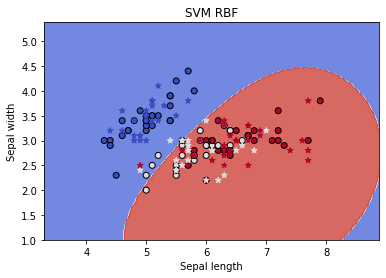

In [11]:
clf = svm.SVC(C=0.1, kernel='rbf', gamma=0.25)
clf.fit(X_train, y_train)

# Pour afficher la surface de décision on va discrétiser l'espace avec un pas h
h = .02
# Créer la surface de décision discretisée
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Surface de décision
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Afficher aussi les points d'apprentissage
plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("SVM RBF")

In [24]:
# Now we will use Digits dataset
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = svm.SVC(C=0.1, kernel='rbf', gamma="scale")
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

(1797, 64)
(1797,)


0.9555555555555556

In [25]:
# Now we use a SVM linear
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = svm.LinearSVC(C=0.1)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

(1797, 64)
(1797,)


/home/jeslava/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9527777777777777

In [26]:
# Apply PCA to digits dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [27]:
X_transf = pca.transform(X)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_transf, y, test_size=0.2)
clf = svm.SVC(C=0.1, kernel='rbf', gamma="scale")
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7416666666666667

Text(0.5, 1.0, 'SVM RBF')

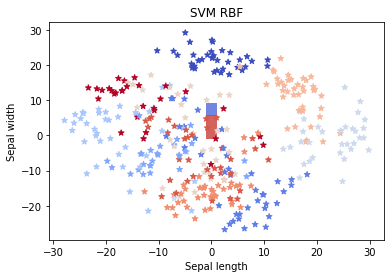

In [33]:
pca2 = PCA(n_components=2)
pca2.fit(X)
X_transf2 = pca2.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transf2, y, test_size=0.2)
clf = svm.SVC(C=0.1, kernel='rbf', gamma="scale")
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

# Pour afficher la surface de décision on va discrétiser l'espace avec un pas h
h = .02
# Créer la surface de décision discretisée
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Surface de décision
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Afficher aussi les points d'apprentissage
#plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("SVM RBF")

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target

from sklearn.decomposition import PCA
pca = PCA(n_components=15)
pca.fit(X)
X_transf = pca.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_transf, y, test_size=0.2)

# Now we will use randomized search for hyper param
from sklearn.model_selection import GridSearchCV

# Dictionnary for hyper parameters:
tuned_parameters = dict(C = [0.05, 0.1, 0.2, 0.3], gamma = [0.1, 0.2, 0.3, 0.4], kernel = ["poly", "rbf", "sigmoid"])

clf = GridSearchCV(svm.SVC(), tuned_parameters, cv=4, refit=True)

clf.fit(X_train, y_train)

# Print results
print(clf.best_params_)

{'C': 0.05, 'gamma': 0.1, 'kernel': 'poly'}


/home/jeslava/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [2]:
clf_best = clf.best_estimator_
clf_best.score(X_test, y_test)

0.9861111111111112